# IMPORTANDO AS BIBLIOTECAS

### Biblioteca para manipulação e análise de dados

In [1]:
import pandas as pd

### Biblioteca para operações matemáticas com base de dados

In [2]:
import numpy as np

### Biblioteca para criação de gráficos e visualizações de dados

In [3]:
import matplotlib.pyplot as plt

### Biblioteca para trabalhar com datas

In [4]:
import datetime

# LENDO OS ARQUIVOS

### Arquivo 'desafio_details' (Contém características de cada anúncio)

In [5]:
detalhes = pd.read_csv('desafio_details.csv')
detalhes.head()

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0
3,3,22343656,Ingleses,06- Apartamento 02 habitaciones,2.0,1.0,5.0,True,28.0
4,4,18328184,Canasvieiras,"Apto 2 quartos em Canasvieiras, Florianopolis!",2.0,1.0,5.0,True,35.0


In [6]:
detalhes.shape

(4691, 9)

### Arquivo 'desafio_priceav' (Contém dados de ocupação e preço de anúncios)

In [7]:
preço = pd.read_csv('desafio_priceav.csv')
preço.head()

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0
3,3,2173,40201349,blank,2020-12-10,250.0,0
4,4,2226,40201349,blank,2021-02-01,250.0,0


In [8]:
preço.shape

(354520, 7)

# QUESTÃO 1: ordene os bairros em ordem crescente de número de listings

### Ordenando os dados

In [9]:
bairros_listings = pd.pivot_table(detalhes, values = 'airbnb_listing_id', index = 'suburb', aggfunc = pd.Series.nunique).sort_values(by = 'airbnb_listing_id', ascending = True).reset_index()

In [10]:
bairros_listings

,suburb,airbnb_listing_id
0,Centro,278
1,Lagoa da Conceição,309
2,Jurerê,539
3,Canasvieiras,1177
4,Ingleses,2388


### Total de listings

In [11]:
total_listings = bairros_listings.airbnb_listing_id.sum()
total_listings

4691

### Porcentagem de listings pelos bairros com maior e menor número de listings

In [12]:
porcent_centro_listings = bairros_listings[bairros_listings['suburb'] == 'Centro'].airbnb_listing_id.sum()/total_listings

In [13]:
porcent_ingleses_listings = bairros_listings[bairros_listings['suburb'] == 'Ingleses'].airbnb_listing_id.sum()/total_listings

In [14]:
porcent_centro_listings.round(2)

0.06

In [15]:
porcent_ingleses_listings.round(2)

0.51

### Gráfico Listings x Bairro

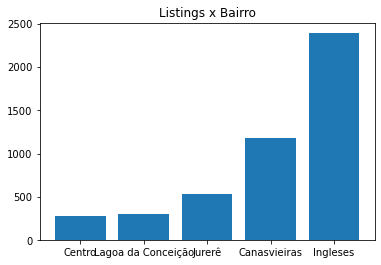

In [16]:
plt.bar(bairros_listings['suburb'],bairros_listings['airbnb_listing_id'])
plt.title("Listings x Bairro")
plt.show()

### Conclusão Questão 1

Conforme os dados acima, o bairro "Centro" possui o menor número de anúncios, com 278, correspondendo a 6% do total. Em contrapartida, o bairro "Ingleses" possui o maior número de anúncios, com um total de 2388, totalizando 51% dos anúncios. O total de anúncios ficou em 4691.

# QUESTÃO 2: Ordene os bairros em ordem crescente de faturamento médio dos listings

### Criando uma junção entre 'detalhes' e 'preço' (já que os bairros estão em um dataframe e os valores no outro)

In [17]:
junção = preço.merge(detalhes,on = 'airbnb_listing_id')

In [18]:
junção.head()

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,2148,40201349,blank,2020-11-15,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,1,2159,40201349,blank,2020-11-26,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,2,2160,40201349,blank,2020-11-27,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
3,3,2173,40201349,blank,2020-12-10,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
4,4,2226,40201349,blank,2021-02-01,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0


### Retirando as linhas com occupied == 0, já que o faturamento diz respeito às datas ocupadas

In [19]:
junção_final = junção[junção['occupied'] == 1]
junção_final['Média_Price'] = junção_final['price_string']
junção_final

C:\Users\NILTON~1\AppData\Local\Temp/ipykernel_9176/3465988394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junção_final['Média_Price'] = junção_final['price_string']


,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Média_Price
12,12,6452,40206270,2021-01-01 00:00:00,2021-01-01,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,380.0
13,13,6453,40206270,2021-01-01 00:00:00,2021-01-02,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,380.0
52,52,6492,40206270,2021-02-10 00:00:00,2021-02-10,195.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,195.0
53,53,6493,40206270,2021-02-10 00:00:00,2021-02-11,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0
54,54,6494,40206270,2021-02-10 00:00:00,2021-02-12,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354508,64589,4298108,40199361,2020-09-16 00:00:00,2021-03-19,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0
354514,64595,4298114,40199361,2020-09-14 00:00:00,2021-03-25,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0
354517,64598,4298117,40199361,2020-09-14 00:00:00,2021-03-28,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0
354518,64599,4298118,40199361,2020-09-14 00:00:00,2021-03-29,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0


### Cálculo do faturamento por bairro

In [20]:
faturamento_bairro = pd.pivot_table(junção_final, values = ['price_string','occupied','airbnb_listing_id'], index = 'suburb', aggfunc = {'price_string': np.sum, 'occupied': np.sum, 'airbnb_listing_id': pd.Series.nunique}).astype(int).sort_values(by = 'price_string', ascending = True).reset_index()
faturamento_bairro['Faturamento_Listings'] = faturamento_bairro['price_string']/faturamento_bairro['airbnb_listing_id']
faturamento_bairro.sort_values(by = 'Faturamento_Listings', ascending = True)

,suburb,airbnb_listing_id,occupied,price_string,Faturamento_Listings
0,Centro,171,7691,1591225,9305.409357
1,Lagoa da Conceição,201,9216,2160116,10746.845771
3,Canasvieiras,816,36553,10682106,13090.816176
4,Ingleses,1636,68313,24263645,14831.078851
2,Jurerê,363,18735,7757805,21371.363636


### Total de faturamento

In [21]:
total_faturamento = faturamento_bairro.price_string.sum()
total_faturamento

46454897

### Porcentagem de faturamento dos bairros com maior e menor faturamento

In [22]:
faturamento_ingleses = faturamento_bairro[faturamento_bairro['suburb'] == 'Ingleses'].price_string.sum()/total_faturamento
faturamento_ingleses.round(2)

0.52

In [23]:
faturamento_centro = faturamento_bairro[faturamento_bairro['suburb'] == 'Centro'].price_string.sum()/total_faturamento
faturamento_centro.round(2)

0.03

### Gráfico do Faturamento x Bairro

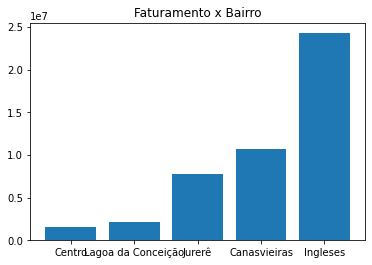

In [24]:
plt.bar(faturamento_bairro['suburb'],faturamento_bairro['price_string'])
plt.title("Faturamento x Bairro")
plt.show()

### Gráfico do faturamento médio por listings

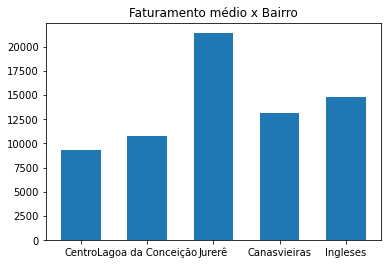

In [25]:
plt.bar(faturamento_bairro['suburb'],faturamento_bairro['Faturamento_Listings'], width = 0.6)
plt.title("Faturamento médio x Bairro")
plt.show()

### Conclusão Questão 2

Conforme os dados acima, é possível visualizar que o bairro "Ingleses" apresentou o maior faturamento, com R$ 24.263.645, totalizando 52%. 
Por outro lado, o bairro "Centro" apresentou o menor faturamento, com apenas RS 1.591.225, totalizando uma porcentagem de 3% do total faturado. Quanto ao faturamento médio, que o total faturado dividido pelo número de anúncios, o bairro "Jurerê" foi o com maior faturamento médio.

# QUESTÃO 3: existem correlações entre as características de um anúncio e seu faturamento?
### a. Quais? Explique

## Análise da influência das características do anúncio no faturamento

### Análise por bairro

#### Criando a tabela com média de preço, total de listings, ocupação, faturamento total e faturamento médio por listings

In [26]:
análise_bairro = pd.pivot_table(junção_final, values = ['price_string','airbnb_listing_id','Média_Price','occupied'], index = 'suburb', aggfunc = {'price_string': np.sum,'airbnb_listing_id': pd.Series.nunique,'Média_Price':np.mean, 'occupied': np.sum}).astype(int).sort_values(by = 'Média_Price', ascending = True).reset_index()
análise_bairro['Faturamento_listings'] = análise_bairro['price_string']/análise_bairro['airbnb_listing_id']
análise_bairro.sort_values(by = 'Faturamento_listings', ascending = True)

,suburb,Média_Price,airbnb_listing_id,occupied,price_string,Faturamento_listings
0,Centro,206,171,7691,1591225,9305.409357
1,Lagoa da Conceição,234,201,9216,2160116,10746.845771
2,Canasvieiras,292,816,36553,10682106,13090.816176
3,Ingleses,355,1636,68313,24263645,14831.078851
4,Jurerê,414,363,18735,7757805,21371.363636


#### Calculando a porcentagem da ocupação dos bairros "Jurerê" e "Ingleses"

In [27]:
porcent_ocupação_Jurerê_Ingleses = análise_bairro[análise_bairro['suburb'] == 'Jurerê'].occupied.sum()/análise_bairro[análise_bairro['suburb'] == 'Ingleses'].occupied.sum()
porcent_ocupação_Jurerê_Ingleses.round(2)

0.27

#### Calculando a porcentagem do faturamento médio dos bairros "Jurerê" e "Ingleses"

In [28]:
porcent_faturamento_médio_Jurerê_Ingleses = análise_bairro[análise_bairro['suburb'] == 'Jurerê'].Faturamento_listings.sum()/análise_bairro[análise_bairro['suburb'] == 'Ingleses'].Faturamento_listings.sum()
porcent_faturamento_médio_Jurerê_Ingleses.round(2)

1.44

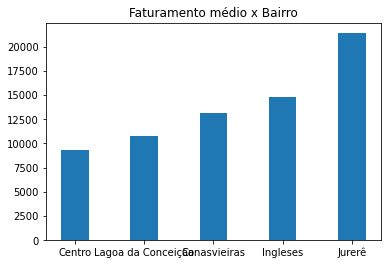

In [29]:
plt.bar(análise_bairro['suburb'], análise_bairro['Faturamento_listings'], width = 0.4)
plt.title("Faturamento médio x Bairro")
plt.show()

Conforme demonstrado nos dados acima, o fator "Bairro" tem infuência no faturamento, uma vez que o bairro "Jurerê" possui o maior valor de faturamento por listings. Isso se dá devido ao fato de que a média de preços dos anúncios em "Jurerê" é a maior dentre os bairros citados, com um valor de R$ 414,00 por anúncio. Com isso, mesmo tendo uma ocupação de 18.735, que corresponde apenas a 27% da ocupação obtida, por exemplo, pelo bairro "Ingleses", "Jurerê" tem um faturamento médio 144% maior que aquele bairro.

### Número de Quartos

#### Criando tabela com número de quartos, média de preços, números de anúncios, total de faturamento e o faturamento médio pelo número de quartos

In [30]:
análise_quartos = pd.pivot_table(junção_final, values = ['price_string','airbnb_listing_id','Média_Price'], index = 'number_of_bedrooms', aggfunc = {'price_string': np.sum,'airbnb_listing_id': pd.Series.nunique,'Média_Price':np.mean}).astype(int).sort_values(by = 'price_string', ascending = True).reset_index()
análise_quartos['Faturamento/quartos'] = análise_quartos['price_string']/análise_quartos['airbnb_listing_id']
análise_quartos.sort_values(by = 'Faturamento/quartos', ascending = True)

,number_of_bedrooms,Média_Price,airbnb_listing_id,price_string,Faturamento/quartos
3,1.0,262,1183,14632161,12368.690617
4,2.0,352,1434,21121809,14729.294979
2,3.0,505,404,7976994,19745.034653
1,4.0,593,41,1081366,26374.780488
0,5.0,614,3,103230,34410.000000


#### Gráfico do Faturamento x Número de quartos

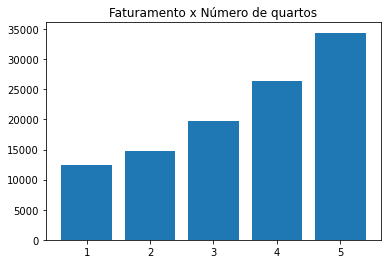

In [31]:
plt.bar(análise_quartos['number_of_bedrooms'], análise_quartos['Faturamento/quartos'])
plt.title("Faturamento x Número de quartos")
plt.show()

Diante dos dados acima, observa-se que o faturamento também é influenciado pelo número de quartos, uma vez que, quanto maior o número de quartos em um anúncio, maior o faturamento, devido ao fato de que o seu preço médio para reserva é maior. Tal situação fica evidenciada ao se analisar a coluna 'Média_Price'. O preço médio aumenta com o número de quartos.

### Número de Banheiros

In [32]:
análise_banheiros = pd.pivot_table(junção_final, values = ['price_string','airbnb_listing_id','Média_Price'], index = 'number_of_bathrooms', aggfunc = {'price_string': np.sum,'airbnb_listing_id': pd.Series.nunique,'Média_Price':np.mean}).astype(int).sort_values(by = 'Média_Price', ascending = True).reset_index()
análise_banheiros['Faturamento_banheiros'] = análise_banheiros['price_string']/análise_banheiros['airbnb_listing_id']
análise_banheiros.sort_values(by = 'Faturamento_banheiros', ascending = True)

,number_of_bathrooms,Média_Price,airbnb_listing_id,price_string,Faturamento_banheiros
0,1.0,268,1764,21811362,12364.717687
1,2.0,397,1257,20840258,16579.361973
4,4.0,623,21,471411,22448.142857
2,3.0,553,139,3141448,22600.345324
5,5.0,684,4,95768,23942.000000
3,6.0,594,1,60600,60600.000000


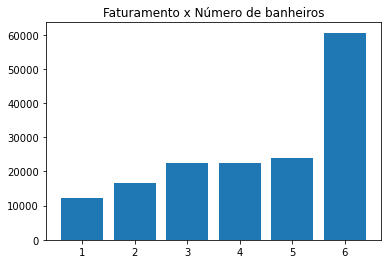

In [33]:
plt.bar(análise_banheiros['number_of_bathrooms'], análise_banheiros['Faturamento_banheiros'])
plt.title("Faturamento x Número de banheiros")
plt.show()

Conforme os dados obtidos pela análise da relação entre o faturamento e o número de banheiros, é possível observar que o faturamento é influenciado pelo número de banheiros até uma determinada quantidade. De 1 a 3 banheiros podemos perceber um aumento no faturamento. Contudo, de 3 a 5 banheiros, não há uma influencia no aumento do faturamento. O faturamento relativo aos anúncios com 6 banheiros não traz muitos esclarecimentos, uma vez que possui baixo número de amostras.

### Conclusão Questão 3

Das análises feitas, pode-se concluir que o fator "Bairro" e o "número de quartos" tem influencia direta no faturamento. O primeiro pode ser explicado pela valorização da localidade, que gera médias de preços maiores, o que aumenta o faturamento do local, mesmo com um número menor de anúncios e, consequentemente, um número menor de ocupação. Já o segundo, tem sua influência notado pelo fato de que o número de quartos gera preços médios maiores da hospedagem.

# QUESTÃO 4: qual a antecedência média das reservas?
## a. Esse número é maior ou menor para finais de semana?

### Analisando os dados da tabela junção_final

In [34]:
junção_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140508 entries, 12 to 354519
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0_x         140508 non-null  int64  
 1   Unnamed: 0.1         140508 non-null  int64  
 2   airbnb_listing_id    140508 non-null  int64  
 3   booked_on            140508 non-null  object 
 4   date                 140508 non-null  object 
 5   price_string         140508 non-null  float64
 6   occupied             140508 non-null  int64  
 7   Unnamed: 0_y         140508 non-null  int64  
 8   suburb               140508 non-null  object 
 9   ad_name              140508 non-null  object 
 10  number_of_bedrooms   133448 non-null  float64
 11  number_of_bathrooms  140457 non-null  float64
 12  star_rating          92727 non-null   float64
 13  is_superhost         140508 non-null  bool   
 14  number_of_reviews    140299 non-null  float64
 15  Média_Price     

Será necessário transformar os dados de "booked_on" e "date" no formato data, para que seja possível encontrar a antecedência da reserva

### Transformando os dados das colunas "booked_on" e "date" no formato data

In [35]:
junção_final ['booked_on'] = pd.to_datetime(junção_final['booked_on'])
junção_final ['date'] = pd.to_datetime(junção_final['date'])


C:\Users\NILTON~1\AppData\Local\Temp/ipykernel_9176/3721885933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junção_final ['booked_on'] = pd.to_datetime(junção_final['booked_on'])
C:\Users\NILTON~1\AppData\Local\Temp/ipykernel_9176/3721885933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junção_final ['date'] = pd.to_datetime(junção_final['date'])


### Incluindo uma coluna com a antecedência das reservas

In [36]:
junção_final['antecedência'] = (junção_final.date - junção_final.booked_on).dt.days

C:\Users\NILTON~1\AppData\Local\Temp/ipykernel_9176/2956613029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junção_final['antecedência'] = (junção_final.date - junção_final.booked_on).dt.days


### Incluindo o dia da semana em que foi ocupado

In [37]:
junção_final['dia_da_semana'] = junção_final['date'].dt.day_name()

C:\Users\NILTON~1\AppData\Local\Temp/ipykernel_9176/2067844126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junção_final['dia_da_semana'] = junção_final['date'].dt.day_name()


In [38]:
junção_final

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Média_Price,antecedência,dia_da_semana
12,12,6452,40206270,2021-01-01,2021-01-01,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,380.0,0,Friday
13,13,6453,40206270,2021-01-01,2021-01-02,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,380.0,1,Saturday
52,52,6492,40206270,2021-02-10,2021-02-10,195.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,195.0,0,Wednesday
53,53,6493,40206270,2021-02-10,2021-02-11,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,1,Thursday
54,54,6494,40206270,2021-02-10,2021-02-12,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354508,64589,4298108,40199361,2020-09-16,2021-03-19,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,184,Friday
354514,64595,4298114,40199361,2020-09-14,2021-03-25,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,192,Thursday
354517,64598,4298117,40199361,2020-09-14,2021-03-28,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,195,Sunday
354518,64599,4298118,40199361,2020-09-14,2021-03-29,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,196,Monday


### Tabela com atencedência média por bairro

In [39]:
análise_antecedência = pd.pivot_table(junção_final, values = 'antecedência',index = 'suburb', aggfunc = np.mean).sort_values(by = 'antecedência', ascending = True).reset_index()
análise_antecedência

,suburb,antecedência
0,Centro,23.146535
1,Lagoa da Conceição,29.148003
2,Canasvieiras,30.699997
3,Jurerê,31.211316
4,Ingleses,46.308785


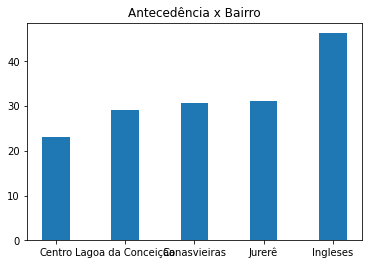

In [40]:
plt.bar(análise_antecedência['suburb'], análise_antecedência['antecedência'],width=0.4)
plt.title("Antecedência x Bairro")
plt.show()

### Média geral da antecedência na reserva

In [41]:
junção_final['antecedência'].mean()

37.841695846499846

### Média geral de antecedência nos fins de semana

In [42]:
fds = ['Saturday','Sunday']

junção_final_fds = junção_final[junção_final['dia_da_semana'].isin(fds)]
junção_final_fds

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,Média_Price,antecedência,dia_da_semana
13,13,6453,40206270,2021-01-01,2021-01-02,380.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,380.0,1,Saturday
56,56,6496,40206270,2021-02-10,2021-02-13,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,3,Saturday
57,57,6497,40206270,2021-02-10,2021-02-13,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,3,Saturday
58,58,6498,40206270,2021-02-10,2021-02-14,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,4,Sunday
59,59,6499,40206270,2021-02-10,2021-02-14,350.0,1,326,Ingleses,Loft novo próximo ao MAR!!,1.0,1.0,NaN,False,1.0,350.0,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354485,64566,4298023,40199361,2020-11-17,2020-12-27,350.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,350.0,40,Sunday
354491,64572,4298029,40199361,2020-10-16,2021-01-02,500.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,500.0,78,Saturday
354502,64583,4298102,40199361,2020-09-16,2021-03-13,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,178,Saturday
354503,64584,4298103,40199361,2020-09-16,2021-03-14,250.0,1,3244,Canasvieiras,Hospede-se no Porto Caravelas em Canasvieiras.,2.0,1.0,5.0,False,4.0,250.0,179,Sunday


In [43]:
junção_final_fds['antecedência'].mean()

37.13446314567614

### Porcentagem entre a antecedência nos fins de semana e no geral

In [44]:
porcent_fds_geral = 1 - junção_final_fds['antecedência'].mean()/junção_final['antecedência'].mean()
print(porcent_fds_geral*100,"%")

1.8689244364007984 %


### Conclusão Questão 4

Conforme os dados avaliados, é possível perceber que a média de antecedência geral das reservas é de 37,84 dias. Já a média de antecedência das reservas nos fins de semana é de 37,10 dias. Diante disso, percebe-se que a reserva nos fins de semana leva 1,87% menos dias a ser feita do que no geral dos dias, o que demonstra uma antecedência ligeiramente menor para os fins de semana. Ademais, o bairro com a maior média de antecedência foi o bairro "Ingleses", com 46,31 dias, aproximadamente. Já o bairro com a menor média de antecedência foi o bairro "Centro", com 23,15 dias, aproximadamente.